**CS596 - Machine Learning**
<br>
Date: **25 November 2020**


Title: **Seminar 10**
<br>
Speaker: **Dr. Shota Tsiskaridze**
<br>
Teaching Assistant: **Levan Sanadiradze**

Sources:<br>
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

https://predictivehacks.com/k-means-elbow-method-code-for-python/

https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html


<h1 align="center">Unsupervised Learning</h1>

<h3 align="center">Hierarchical Clustering</h3>

- Suppose we have a collection of data points represented by a `numpy` array as follows:

In [2]:
import numpy as np

X = np.array([[5,3],
              [10,15],
              [15,12],
              [24,10],
              [30,30],
              [85,70],
              [71,80],
              [60,78],
              [70,55],
              [80,91],])

- Let's plot the above data points:

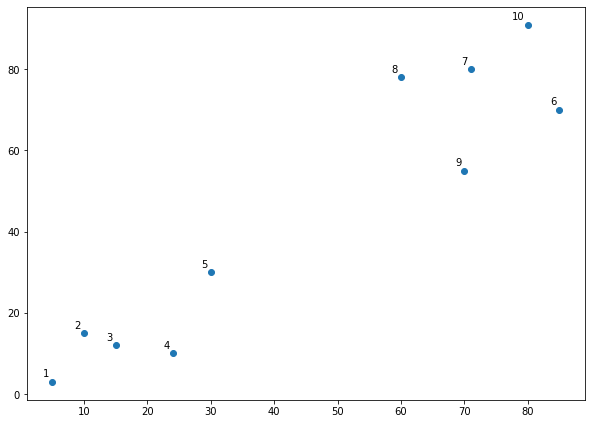

In [4]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

- Let's draw the **dendrograms** for our data points. 

- For this, we will use the scipy library for that purpose:

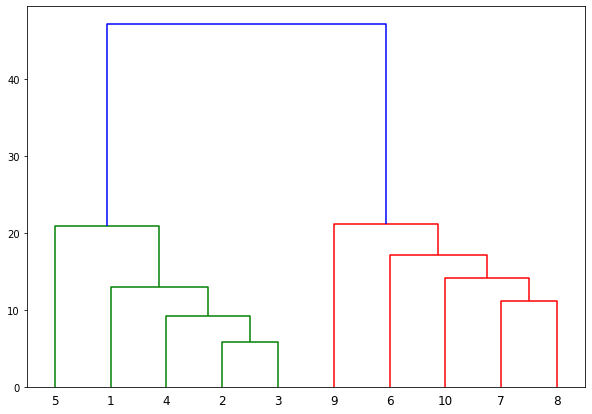

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

- The algorithm **starts** by **finding the two points** that are **closest to each other** on the basis of Euclidean distance.


- If we look at the first graph, we will see that **points 2** and **3** are **closest to each other**, i.e. the **first cluster** will be **formed between these two points**.


- The next step will be the **points 7** and **8**.


- The **vertical height** of the dendogram shows the **Euclidean distances between points**. 


- From this plot, it can be seen that **Euclidean distance** between **points 8** and **7** is **greater** than the **distance** between **point 2** and **3**.


- The **next step** is to **join the cluster** formed by joining **two points** to the next **nearest cluster or point** which in turn results in another cluster. 


- This **process continues until all the points are joined together** to form **one big cluster**.

- Once one **big cluster** is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. 


- The number of vertical lines this newly created horizontal line passes is equal to **number of clusters**:


  <img src="images/S10_Hierarchical_Clustering.png" width="600" alt="Example" />


- We can see that the **largest vertical distance** without any horizontal line passing through it is represented by blue line. 


- So we draw a **new horizontal red line** that passes through the blue line. 


- Since it **crosses the blue line at two points**, therefore the **number of clusters** will be **2**.

- Basically the **horizontal line is a threshold**, which defines the **minimum distance required to be a separate cluster**. 


- If we **draw a line further down**, the threshold required to be a new cluster will be decreased and **more clusters will be formed**:

  <img src="images/S10_Hierarchical_Clustering2.png" width="600" alt="Example" />


<h3 align="center">K-Means Clustering Algorithm with Iris Dataset</h3>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [10]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'])
print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


- We can easily run $K$-**Means clustering** for a range of clusters using a for loop and **collecting** the **distortions** into a **list**.

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

- Let's plot the distortions of $K$-**Means clustering algorithm**:

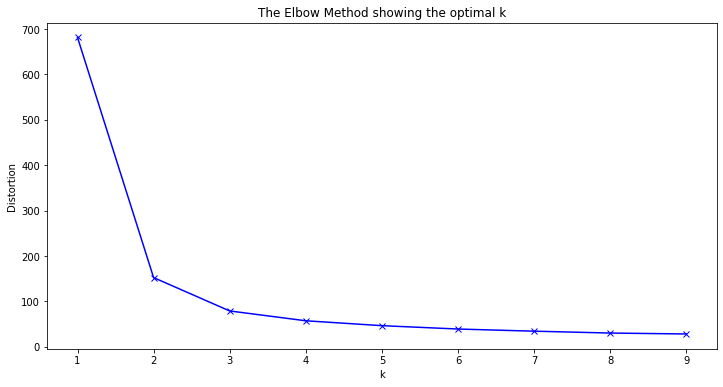

In [16]:
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

- We can observe that the **elbow** is the **number $3$** which is **optimal for this case**. 


- Now we can run a $K$-Means using as `n_clusters = 3`

In [17]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'K_Means')

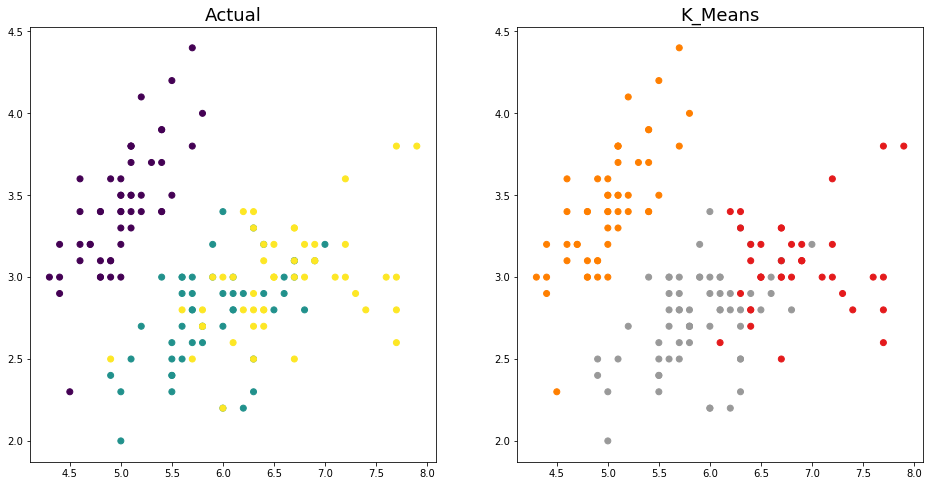

In [18]:
df['k_means']=kmeanModel.predict(df)
df['target']=iris['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

- Given the number of clusters, it is easy to see that the $K$-**Means Clustering algorithm** does a **really good job** defining the clusters of the dataset:

  <img src="images/S10_animated.gif" width="900" alt="Example" />

<h3 align="center">Color Quantization using K-Means Clustering Algorithm</h3>


In [30]:
#IMPORTS
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import six
from io import StringIO

In [45]:
#Image name you want to do color quantization
image_name="data/Sameba.jpg"
display.HTML('<img src="{}" height=20px style="height: 400px;">'.format(image_name))

In [53]:
#To load the image as an numpy array
Sameba = misc.imread(image_name)
print(image)
print(image.shape)

[[[1.53787005e-05 9.22722030e-05 5.84390619e-04]
  [0.00000000e+00 7.68935025e-05 5.38254517e-04]
  [0.00000000e+00 6.15148020e-05 5.22875817e-04]
  ...
  [0.00000000e+00 6.15148020e-05 4.45982314e-04]
  [0.00000000e+00 6.15148020e-05 4.45982314e-04]
  [0.00000000e+00 6.15148020e-05 4.45982314e-04]]

 [[1.53787005e-05 9.22722030e-05 5.38254517e-04]
  [0.00000000e+00 7.68935025e-05 5.22875817e-04]
  [0.00000000e+00 7.68935025e-05 5.22875817e-04]
  ...
  [0.00000000e+00 6.15148020e-05 4.45982314e-04]
  [0.00000000e+00 7.68935025e-05 4.15224913e-04]
  [0.00000000e+00 7.68935025e-05 4.15224913e-04]]

 [[1.53787005e-05 1.07650903e-04 5.07497116e-04]
  [1.53787005e-05 1.07650903e-04 5.07497116e-04]
  [1.53787005e-05 1.23029604e-04 5.22875817e-04]
  ...
  [0.00000000e+00 7.68935025e-05 3.84467512e-04]
  [0.00000000e+00 7.68935025e-05 3.84467512e-04]
  [0.00000000e+00 7.68935025e-05 3.84467512e-04]]

 ...

 [[3.07574010e-05 1.53787005e-04 4.45982314e-04]
  [3.07574010e-05 1.53787005e-04 4.4598

D:\Work\MaxinAI\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  


In [54]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Widht:",w)
print("Height:",h)
print("Channels/Dimension:",d)
print("Each channel for RGB and Range is [0 -255]")
print("If each channel required 1 byte of space which means 3 bytes for each pixel")
print("\nThen for whole image it will require {} x {} x {} = {} bytes".format(w,h,d,w*h*d))
print("Which comes around {} Mb".format((w*h*d)/(10000000)))

Widht: 600
Height: 800
Channels/Dimension: 3
Each channel for RGB and Range is [0 -255]
If each channel required 1 byte of space which means 3 bytes for each pixel

Then for whole image it will require 600 x 800 x 3 = 1440000 bytes
Which comes around 0.144 Mb


In [65]:
image = np.array(Sameba, dtype=np.float64) / 255
assert d == 3
image_array = np.reshape(image, (w * h, d))

In [62]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(image_array)
    distortions.append(kmeanModel.inertia_)

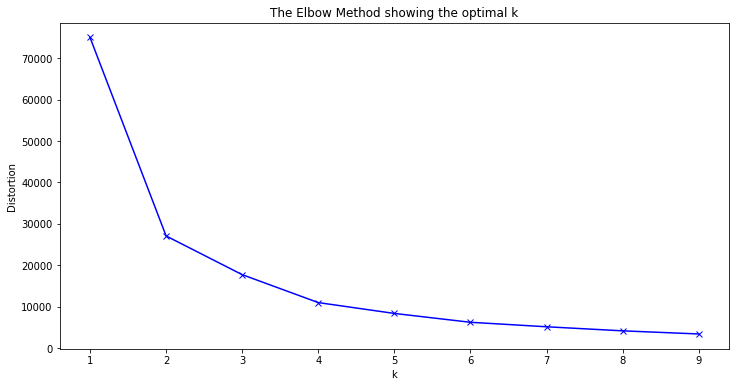

In [63]:
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Fitting model on a small sub-sample of the data
done in 0.164s.
Predicting color indices on the full image (k-means)
done in 0.136s.
Predicting color indices on the full image (random)
done in 0.125s.


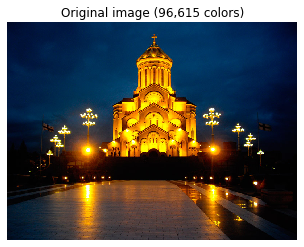

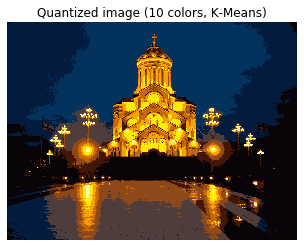

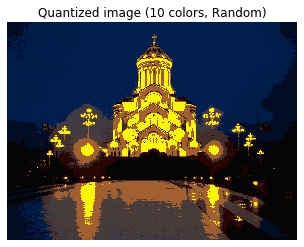

In [68]:
n_colors = 10

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(image)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

<h1 align="center">End of Seminar</h1>